<a href="https://colab.research.google.com/github/annefrancine/DataScience_Estiam/blob/main/BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Qu'est-ce que BERT?

BERT est l'acronyme de Bidirectional Encoder Representations from Transformers.Il s'agit d'un modèle d'apprentissage automatique de pointe utilisé pour les tâches NLP. Jacob Devlin et ses collègues ont développé BERT chez Google en 2018. Devlin et ses collègues ont formé le BERT sur Wikipedia anglais (2500 millions de mots) et BooksCorpus (800 millions de mots) et ont obtenu les meilleures précisions pour certaines des tâches de PNL en 2018. Il y en a deux Variations générales pré-entraînées du BERT: le modèle de base est une architecture de réseau neuronal à 12 couches, 768 masquées, 12 têtes, 110M paramètres, tandis que le grand modèle est un paramètre à 24 couches, 1024 masqués, 16 têtes, 340M architecture de réseau neuronal. La figure 2 montre la visualisation du réseau BERT créé par Devlin et al.

documentation : https://huggingface.co/transformers/model_doc/bert.html

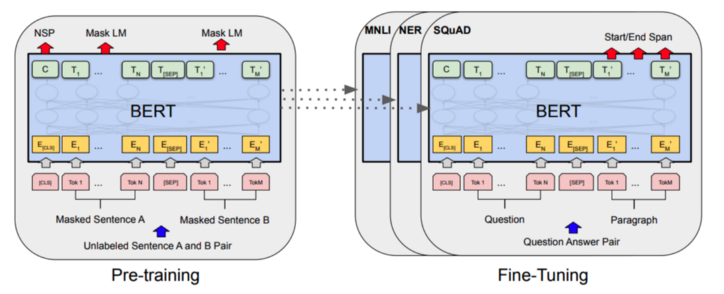

## Analyse des sentiments avec BERT
Maintenant que nous avons couvert les bases de BERT et Hugging Face , nous pouvons plonger dans notre tutoriel. Nous allons effectuer les opérations suivantes pour former un modèle d'analyse des sentiments:

Installer la bibliothèque Transformers;
Chargez le classificateur BERT et le Tokenizer avec des modules d'entrée;
Téléchargez les données d'examen IMDB et créez un ensemble de données traité (cela prendra plusieurs opérations;
Configurer le modèle BERT chargé et s'entraîner pour un réglage fin
Faire des prédictions avec le modèle affiné

## Installation de transformateurs:

L'installation de la bibliothèque Transformers est assez simple. Exécutez simplement la ligne pip suivante sur une cellule Google Colab:

In [ ]:
!pip install transformers

     |████████████████████████████████| 2.8 MB 9.4 MB/s 
     |████████████████████████████████| 3.3 MB 46.1 MB/s 
     |████████████████████████████████| 50 kB 4.1 MB/s 
     |████████████████████████████████| 895 kB 68.6 MB/s 
     |████████████████████████████████| 636 kB 66.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


Une fois l'installation terminée, nous chargerons le tokenizer et le classificateur de séquence BERT pré-entraînés ainsi que InputExampleet InputFeatures. Ensuite, nous allons construire notre modèle avec le classificateur de séquence et notre tokenizer avec le Tokenizer de BERT.

In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
model.summary()
# Voici les résultats. Nous avons le modèle BERT principal, une couche d'abandon
# pour éviter le surajustement, et enfin une couche dense pour la tâche de classification:

Model: "tf_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bert (TFBertMainLayer)       multiple                  109482240 
_________________________________________________________________
dropout_37 (Dropout)         multiple                  0         
_________________________________________________________________
classifier (Dense)           multiple                  1538      
Total params: 109,483,778
Trainable params: 109,483,778
Non-trainable params: 0
_________________________________________________________________


## Ensemble de données IMDB
IMDB Reviews Dataset est un grand ensemble de données de critiques de films collecté et préparé par Andrew L. Maas à partir du service de classification de films populaire, IMDB . L' ensemble de données IMDB Reviews est utilisé pour la classification des sentiments binaires, qu'un avis soit positif ou négatif. Il contient 25 000 critiques de films pour la formation et 25 000 pour les tests. Tous ces 50000 avis sont des données étiquetées qui peuvent être utilisées pour un apprentissage en profondeur supervisé. En outre, il y a 50 000 avis non étiquetés supplémentaires que nous n'utiliserons pas dans cette étude de cas. Dans cette étude de cas, nous n'utiliserons que l'ensemble de données d'entraînement.

## Importations initiales
Nous aurons d'abord deux importations: TensorFlow et Pandas

In [ ]:
import tensorflow as tf
import pandas as pd

## Obtenez les données du Stanford Repo: 

Ensuite, nous pouvons télécharger l'ensemble de données à partir du répertoire pertinent de Stanford avec la tf.keras.utils.get_filefonction, comme indiqué ci-dessous:

In [ ]:
URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file(fname="aclImdb_v1.tar.gz", 
                                  origin=URL,
                                  untar=True,
                                  cache_dir='.',
                                  cache_subdir='')

84140032/84125825 [==============================] - 1s 0us/step


## Supprimer les avis non étiquetés:

Pour supprimer les avis non étiquetés, nous avons besoin des opérations suivantes. Les commentaires ci-dessous expliquent chaque opération:

In [ ]:
# The shutil module offers a number of high-level 
# operations on files and collections of files.
import os
import shutil
# Create main directory path ("/aclImdb")
main_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')
# Create sub directory path ("/aclImdb/train")
train_dir = os.path.join(main_dir, 'train')
# Remove unsup folder since this is a supervised learning task
remove_dir = os.path.join(train_dir, 'unsup')
shutil.rmtree(remove_dir)
# View the final train folder
print(os.listdir(train_dir))

['pos', 'neg', 'urls_unsup.txt', 'unsupBow.feat', 'urls_pos.txt', 'labeledBow.feat', 'urls_neg.txt']


## Formation et test Split:

Maintenant que nos données sont nettoyées et préparées, nous pouvons créer text_dataset_from_directoryavec les lignes suivantes. Je souhaite traiter toutes les données en un seul lot. C'est pourquoi j'ai sélectionné une très grande taille de lot:

In [ ]:
# We create a training dataset and a validation 
# dataset from our "aclImdb/train" directory with a 80/20 split.
train = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='training', seed=123)
test = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', batch_size=30000, validation_split=0.2, 
    subset='validation', seed=123)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


## Convertir en pandas pour visualiser et traiter: 

Maintenant que nous avons nos ensembles de données de base de train et de test, je veux les préparer pour notre modèle BERT. Pour le rendre plus compréhensible, je vais créer un dataframe pandas à partir de notre objet de jeu de données TensorFlow. Le code suivant convertit notre objet Train Dataset pour former le dataframe pandas:

In [ ]:
for i in train.take(1):
  train_feat = i[0].numpy()
  train_lab = i[1].numpy()

train = pd.DataFrame([train_feat, train_lab]).T
train.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
train['DATA_COLUMN'] = train['DATA_COLUMN'].str.decode("utf-8")
train.head()

,DATA_COLUMN,LABEL_COLUMN
0,Canadian director Vincenzo Natali took the art...,1
1,I gave this film 10 not because it is a superb...,1
2,I admit to being somewhat jaded about the movi...,1
3,"For a long time, 'The Menagerie' was my favori...",1
4,A truly frightening film. Feels as if it were ...,0


In [ ]:
# je ferai les mêmes opérations pour l'ensemble de données de test avec les lignes suivantes:

for j in test.take(1):
  test_feat = j[0].numpy()
  test_lab = j[1].numpy()

test = pd.DataFrame([test_feat, test_lab]).T
test.columns = ['DATA_COLUMN', 'LABEL_COLUMN']
test['DATA_COLUMN'] = test['DATA_COLUMN'].str.decode("utf-8")
test.head()


,DATA_COLUMN,LABEL_COLUMN
0,I can't believe that so much talent can be was...,0
1,This movie blows - let's get that straight rig...,0
2,"The saddest thing about this ""tribute"" is that...",0
3,I'm only rating this film as a 3 out of pity b...,0
4,Something surprised me about this movie - it w...,1


## Création de séquences d'entrée :

Nous avons deux objets Dataframe pandas qui nous attendent pour les convertir en objets adaptés au modèle BERT. Nous profiterons de la InputExamplefonction qui nous aide à créer des séquences à partir de notre jeu de données. La InputExamplefonction peut être appelée comme suit:

In [ ]:
InputExample(guid=None,
             text_a = "Hello, world",
             text_b = None,
             label = 1)

InputExample(guid=None, text_a='Hello, world', text_b=None, label=1)

Nous allons maintenant créer deux fonctions principales:

1 - convert_data_to_examples: Cela acceptera nos ensembles de données de train et de test et convertira chaque ligne en un objet InputExample.

2 - convert_examples_to_tf_dataset: Cette fonction va tokeniser les objets InputExample, puis créer le format d'entrée requis avec les objets tokenisés, enfin, créer un jeu de données d'entrée que nous pouvons alimenter au modèle.

In [ ]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

  train_InputExamples, validation_InputExamples = convert_data_to_examples(train, 
                                                                           test, 
                                                                           'DATA_COLUMN', 
                                                                           'LABEL_COLUMN')
  
def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] # -> will hold InputFeatures to be converted later

    for e in examples:
        # Documentation is really strong for this method, so please take a look at it
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length, # truncates if len(s) > max_length
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
            truncation=True
        )

        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])

        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


DATA_COLUMN = 'DATA_COLUMN'
LABEL_COLUMN = 'LABEL_COLUMN'

Nous pouvons appeler les fonctions que nous avons créées ci-dessus avec les lignes suivantes:

In [ ]:
train_InputExamples, validation_InputExamples = convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN)

train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

validation_data = convert_examples_to_tf_dataset(list(validation_InputExamples), tokenizer)
validation_data = validation_data.batch(32)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Notre jeu de données contenant des séquences d'entrée traitées est prêt à être introduit dans le modèle.

## Configuration du modèle BERT et mise au point

Nous utiliserons Adam comme optimiseur, CategoricalCrossentropy comme fonction de perte et SparseCategoricalAccuracy comme mesure de précision. Le réglage fin du modèle pour 2 époques nous donnera une précision d'environ 95%, ce qui est excellent.

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

model.fit(train_data, epochs=2, validation_data=validation_data)

Epoch 1/2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autogr

L'entraînement du modèle peut prendre un certain temps, alors assurez-vous d'avoir activé l'accélération GPU à partir des paramètres du notebook. Une fois notre formation terminée, nous pouvons passer à la prédiction des sentiments.

## Faire des prédictions
J'ai créé une liste de deux avis que j'ai créés. Le premier est un avis positif, tandis que le second est clairement négatif.

In [ ]:
pred_sentences = ['This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good',
                  'One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie']


Nous devons tokeniser nos avis avec notre tokenizer BERT pré-formé. Nous allons ensuite transmettre ces séquences tokenisées à notre modèle et exécuter une couche softmax finale pour obtenir les prédictions. Nous pouvons ensuite utiliser la argmaxfonction pour déterminer si notre prédiction de sentiment pour l'avis est positive ou négative. Enfin, nous imprimerons les résultats avec une simple boucle for. Les lignes suivantes effectuent toutes ces opérations:

In [ ]:
tf_batch = tokenizer(pred_sentences, max_length=128, padding=True, truncation=True, return_tensors='tf')
tf_outputs = model(tf_batch)
tf_predictions = tf.nn.softmax(tf_outputs[0], axis=-1)
labels = ['Negative','Positive']
label = tf.argmax(tf_predictions, axis=1)
label = label.numpy()
for i in range(len(pred_sentences)):
  print(pred_sentences[i], ": \n", labels[label[i]])

This was an awesome movie. I watch it twice my time watching this beautiful movie if I have known it was this good : 
 Positive
One of the worst movies of all time. I cannot believe I wasted two hours of my life for this movie : 
 Negative
